## 1. From epidemic to pandemic
<p><img style="float: left; margin:5px 20px 5px 1px; width:40%" src="https://www.nps.gov/aboutus/news/images/CDC-coronavirus-image-23311-for-web.jpg?maxwidth=650&autorotate=false"></p>
<p>In December 2019, COVID-19 coronavirus was first identified in the Wuhan region of China. By March 11, 2020, the World Health Organization (WHO) categorized the COVID-19 outbreak as a pandemic. A lot has happened in the months in between with major outbreaks in Iran, South Korea, and Italy. </p>
<p>We know that COVID-19 spreads through respiratory droplets, such as through coughing, sneezing, or speaking. But, how quickly did the virus spread across the globe? And, can we see any effect from country-wide policies, like shutdowns and quarantines? </p>
<p>Fortunately, organizations around the world have been collecting data so that governments can monitor and learn from this pandemic. Notably, the Johns Hopkins University Center for Systems Science and Engineering created a <a href="https://github.com/RamiKrispin/coronavirus">publicly available data repository</a> to consolidate this data from sources like the WHO, the Centers for Disease Control and Prevention (CDC), and the Ministry of Health from multiple countries.</p>
<p>In this notebook, you will visualize COVID-19 data from the first several weeks of the outbreak to see at what point this virus became a global pandemic.</p>
<p><em>Please note that information and data regarding COVID-19 is frequently being updated. The data used in this project was pulled on March 17, 2020, and should not be considered to be the most up to date data available.</em></p>

In [54]:
# Load the readr, ggplot2, and dplyr packages
library("readr")
library("ggplot2")
library("dplyr")

# Read datasets/confirmed_cases_worldwide.csv into confirmed_cases_worldwide
confirmed_cases_worldwide <- read_csv("datasets/confirmed_cases_worldwide.csv")

# See the result
confirmed_cases_worldwide

Parsed with column specification:
cols(
  date = col_date(format = ""),
  cum_cases = col_double()
)


date,cum_cases
<date>,<dbl>
2020-01-22,555
2020-01-23,653
2020-01-24,941
2020-01-25,1434
2020-01-26,2118
2020-01-27,2927
2020-01-28,5578
2020-01-29,6166
2020-01-30,8234


## 2. Confirmed cases throughout the world
<p>The table above shows the cumulative confirmed cases of COVID-19 worldwide by date. Just reading numbers in a table makes it hard to get a sense of the scale and growth of the outbreak. Let's draw a line plot to visualize the confirmed cases worldwide.</p>

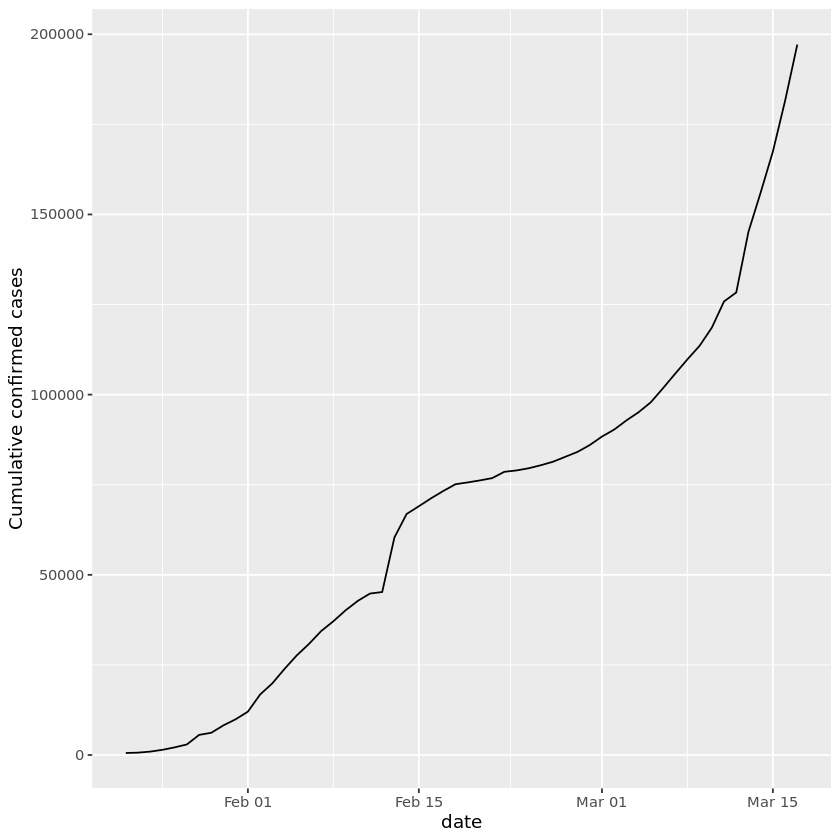

In [56]:
# Draw a line plot of cumulative cases vs. date
# Label the y-axis
ggplot(confirmed_cases_worldwide,aes(date,cum_cases))+
    geom_line()+
    ylab("Cumulative confirmed cases")

## 3. China compared to the rest of the world
<p>The y-axis in that plot is pretty scary, with the total number of confirmed cases around the world approaching 200,000. Beyond that, some weird things are happening: there is an odd jump in mid February, then the rate of new cases slows down for a while, then speeds up again in March. We need to dig deeper to see what is happening.</p>
<p>Early on in the outbreak, the COVID-19 cases were primarily centered in China. Let's plot confirmed COVID-19 cases in China and the rest of the world separately to see if it gives us any insight.</p>
<p><em>We'll build on this plot in future tasks. One thing that will be important for the following tasks is that you add aesthetics within the line geometry of your ggplot, rather than making them global aesthetics.</em></p>

Parsed with column specification:
cols(
  is_china = col_character(),
  date = col_date(format = ""),
  cases = col_double(),
  cum_cases = col_double()
)


Observations: 112
Variables: 4
$ is_china  <chr> "China", "China", "China", "China", "China", "China", "Ch...
$ date      <date> 2020-01-22, 2020-01-23, 2020-01-24, 2020-01-25, 2020-01-...
$ cases     <dbl> 548, 95, 277, 486, 669, 802, 2632, 578, 2054, 1661, 2089,...
$ cum_cases <dbl> 548, 643, 920, 1406, 2075, 2877, 5509, 6087, 8141, 9802, ...


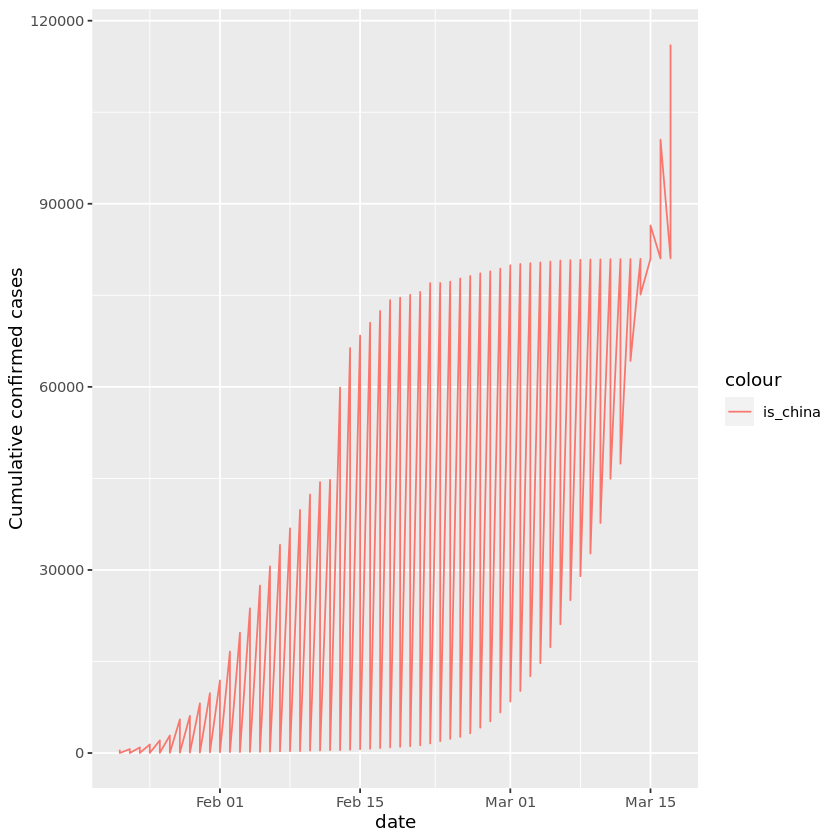

In [58]:
# Read in datasets/confirmed_cases_china_vs_world.csv
confirmed_cases_china_vs_world <- read_csv("datasets/confirmed_cases_china_vs_world.csv")
# See the result
glimpse(confirmed_cases_china_vs_world)

# Draw a line plot of cumulative cases vs. date, grouped and colored by is_china
# Define aesthetics within the line geom
plt_cum_confirmed_cases_china_vs_world <- ggplot(confirmed_cases_china_vs_world) +
  geom_line(aes(date,cum_cases,group="is_china",color="is_china")) +
  ylab("Cumulative confirmed cases")

# See the plot
plt_cum_confirmed_cases_china_vs_world

## 4. Let's annotate!
<p>Wow! The two lines have very different shapes. In February, the majority of cases were in China. That changed in March when it really became a global outbreak: around March 14, the total number of cases outside China overtook the cases inside China. This was days after the WHO declared a pandemic.</p>
<p>There were a couple of other landmark events that happened during the outbreak. For example, the huge jump in the China line on February 13, 2020 wasn't just a bad day regarding the outbreak; China changed the way it reported figures on that day (CT scans were accepted as evidence for COVID-19, rather than only lab tests).</p>
<p>By annotating events like this, we can better interpret changes in the plot.</p>

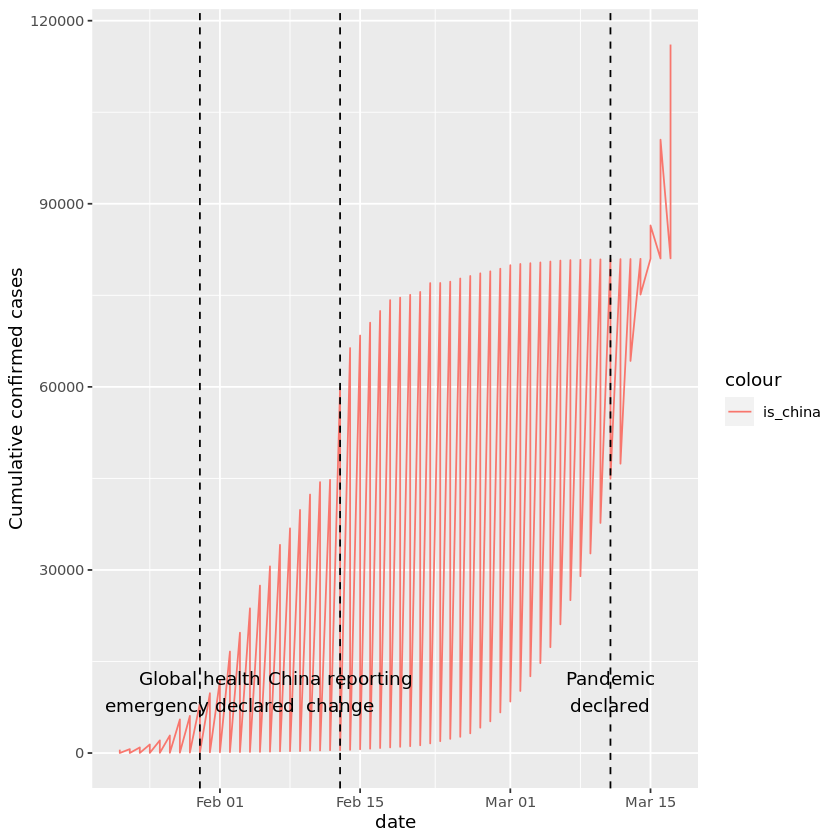

In [60]:
who_events <- tribble(
  ~ date, ~ event,
  "2020-01-30", "Global health\nemergency declared",
  "2020-03-11", "Pandemic\ndeclared",
  "2020-02-13", "China reporting\nchange"
) %>%
  mutate(date = as.Date(date))

# Using who_events, add vertical dashed lines with an xintercept at date
# and text at date, labeled by event, and at 100000 on the y-axis
plt_cum_confirmed_cases_china_vs_world +
  geom_vline(aes(xintercept = date),data=who_events,linetype="dashed") +
  geom_text(aes(date,label=event),data=who_events,y=10000)

## 5. Adding a trend line to China
<p>When trying to assess how big future problems are going to be, we need a measure of how fast the number of cases is growing. A good starting point is to see if the cases are growing faster or slower than linearly.</p>
<p>There is a clear surge of cases around February 13, 2020, with the reporting change in China. However, a couple of days after, the growth of cases in China slows down. How can we describe COVID-19's growth in China after February 15, 2020?</p>

`geom_smooth()` using formula 'y ~ x'


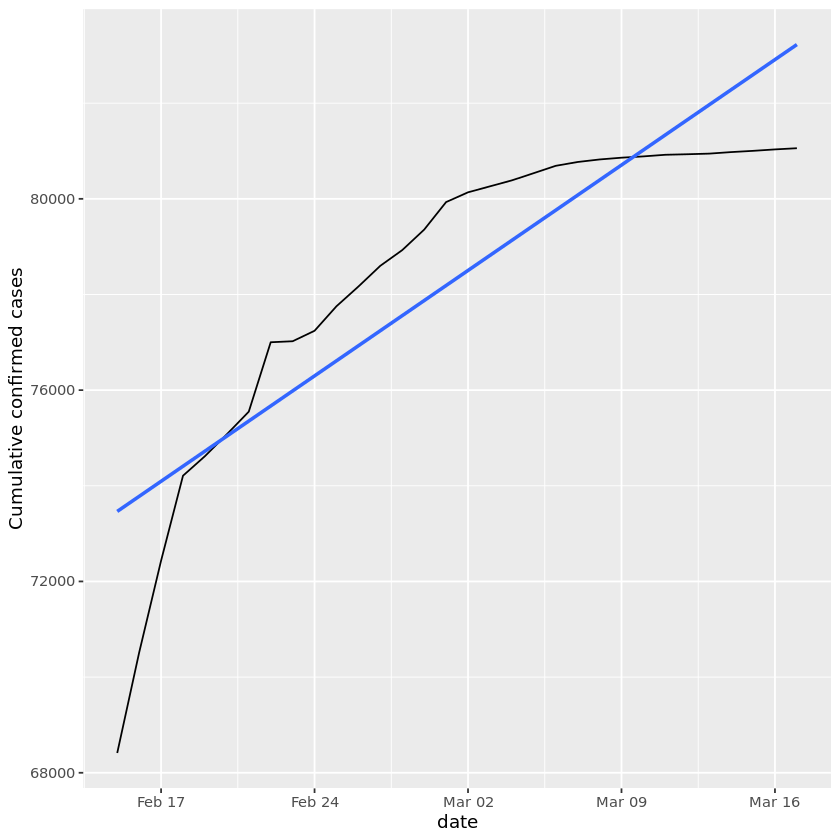

In [62]:
# Filter for China, from Feb 15
china_after_feb15 <- confirmed_cases_china_vs_world %>%
  filter(is_china=="China",date>= "2020-02-15")

# Using china_after_feb15, draw a line plot cum_cases vs. date
# Add a smooth trend line using linear regression, no error bars
ggplot(china_after_feb15,aes(date,cum_cases)) +
  geom_line() +
  geom_smooth(method="lm",se=FALSE) +
  ylab("Cumulative confirmed cases")

## 6. And the rest of the world?
<p>From the plot above, the growth rate in China is slower than linear. That's great news because it indicates China has at least somewhat contained the virus in late February and early March.</p>
<p>How does the rest of the world compare to linear growth?</p>

`geom_smooth()` using formula 'y ~ x'


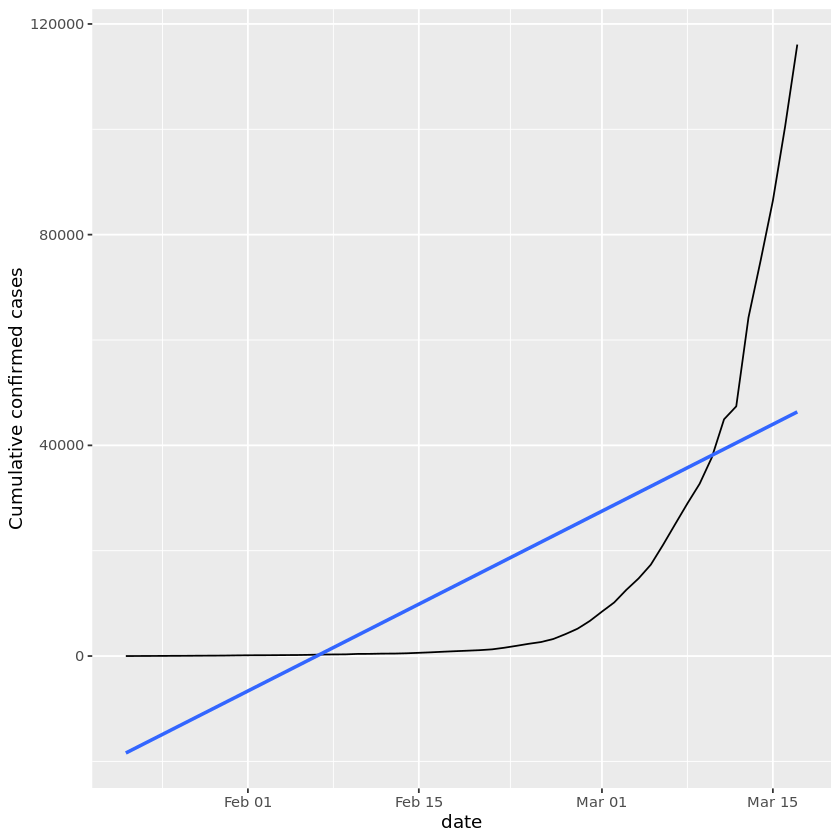

In [64]:
# Filter confirmed_cases_china_vs_world for not China
not_china <- confirmed_cases_china_vs_world %>%
    filter(is_china=="Not China")

# Using not_china, draw a line plot cum_cases vs. date
# Add a smooth trend line using linear regression, no error bars
plt_not_china_trend_lin <- ggplot(not_china,aes(date,cum_cases)) +
  geom_line() +
  geom_smooth(method="lm",se=FALSE) +
  ylab("Cumulative confirmed cases")

# See the result
plt_not_china_trend_lin 

## 7. Adding a logarithmic scale
<p>From the plot above, we can see a straight line does not fit well at all, and the rest of the world is growing much faster than linearly. What if we added a logarithmic scale to the y-axis?</p>

`geom_smooth()` using formula 'y ~ x'


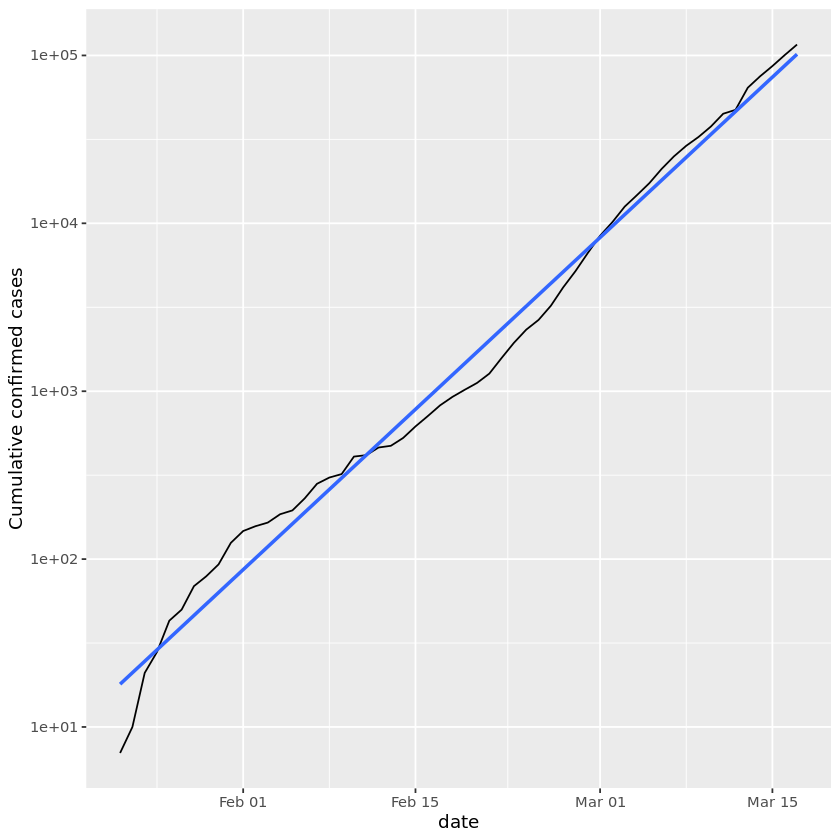

In [66]:
# Modify the plot to use a logarithmic scale on the y-axis
plt_not_china_trend_lin + 
  scale_y_log10()

## 8. Which countries outside of China have been hit hardest?
<p>With the logarithmic scale, we get a much closer fit to the data. From a data science point of view, a good fit is great news. Unfortunately, from a public health point of view, that means that cases of COVID-19 in the rest of the world are growing at an exponential rate, which is terrible news.</p>
<p>Not all countries are being affected by COVID-19 equally, and it would be helpful to know where in the world the problems are greatest. Let's find the countries outside of China with the most confirmed cases in our dataset.</p>

In [68]:
# Run this to get the data for each country
confirmed_cases_by_country <- read_csv("datasets/confirmed_cases_by_country.csv")
glimpse(confirmed_cases_by_country)

# Group by country, summarize to calculate total cases, find the top 7
top_countries_by_total_cases <- confirmed_cases_by_country %>%
  group_by(country) %>%
  summarize(total_cases=max(cum_cases)) %>%
  top_n(7)

# See the result
top_countries_by_total_cases

Parsed with column specification:
cols(
  country = col_character(),
  province = col_character(),
  date = col_date(format = ""),
  cases = col_double(),
  cum_cases = col_double()
)


Observations: 13,272
Variables: 5
$ country   <chr> "Afghanistan", "Albania", "Algeria", "Andorra", "Antigua ...
$ province  <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N...
$ date      <date> 2020-01-22, 2020-01-22, 2020-01-22, 2020-01-22, 2020-01-...
$ cases     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ cum_cases <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...


Selecting by total_cases


country,total_cases
<chr>,<dbl>
France,7699
Germany,9257
Iran,16169
Italy,31506
"Korea, South",8320
Spain,11748
US,6421


## 9. Plotting hardest hit countries as of Mid-March 2020
<p>Even though the outbreak was first identified in China, there is only one country from East Asia (South Korea) in the above table. Four of the listed countries (France, Germany, Italy, and Spain) are in Europe and share borders. To get more context, we can plot these countries' confirmed cases over time.</p>
<p>Finally, congratulations on getting to the last step! If you would like to continue making visualizations or find the hardest hit countries as of today, you can do your own analyses with the latest data available <a href="https://github.com/RamiKrispin/coronavirus">here</a>. </p>

Parsed with column specification:
cols(
  country = col_character(),
  date = col_date(format = ""),
  cum_cases = col_double()
)


Observations: 2,030
Variables: 3
$ country   <chr> "Germany", "Iran", "Italy", "Korea, South", "Spain", "US"...
$ date      <date> 2020-02-18, 2020-02-18, 2020-02-18, 2020-02-18, 2020-02-...
$ cum_cases <dbl> 16, 0, 3, 31, 2, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, ...


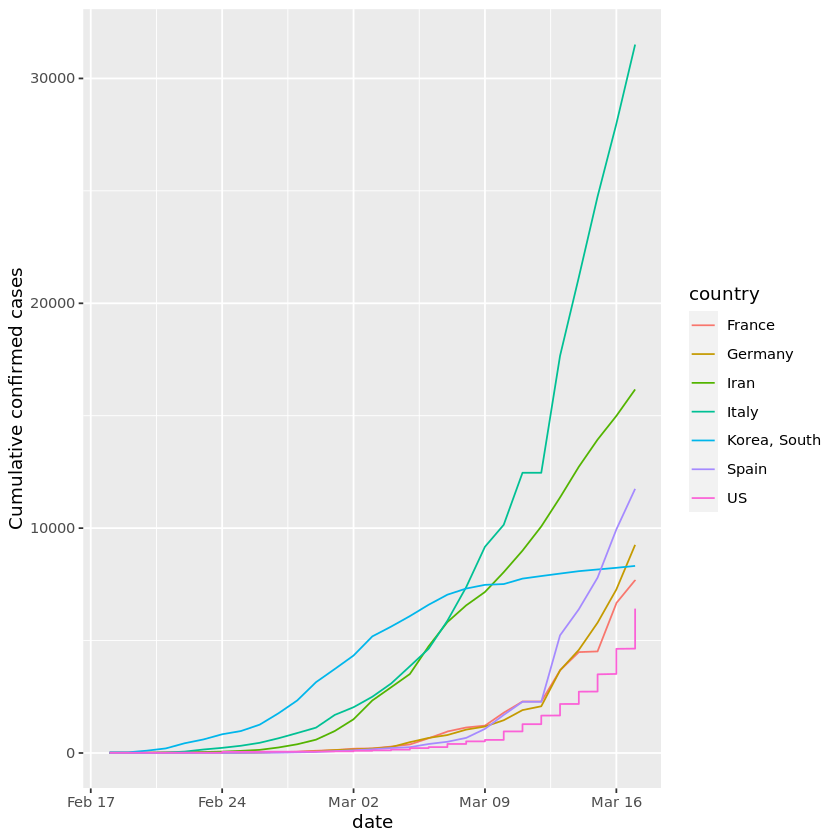

In [70]:
# Run this to get the data for the top 7 countries
confirmed_cases_top7_outside_china <- read_csv("datasets/confirmed_cases_top7_outside_china.csv")
# 
glimpse(confirmed_cases_top7_outside_china)

# Using confirmed_cases_top7_outside_china, draw a line plot of
# cum_cases vs. date, grouped and colored by country
ggplot(confirmed_cases_top7_outside_china,aes(date,cum_cases,color=country,group=country))+
    geom_line()+
    ylab("Cumulative confirmed cases")